<a href="https://colab.research.google.com/github/L40S38/GAT_practice/blob/main/gat_with_pytorch_geometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:[PyG (PyTorch Geometric) で GAT (Graph Attention Networks)](https://qiita.com/maskot1977/items/f6b47206a302a8a372a5#%E3%81%8A%E3%82%8F%E3%82%8A) written by @maskot1977

## PyG(PyTorch Geometric)のインストール

In [1]:
#colabでやるならこっち
#!pip install graphviz
#!pip install torchviz

In [2]:
#ローカルのcondaでやるならこっち
#%conda install python==3.10.6
#%conda install -c conda-forge matplotlib -y
#%conda install -c pytorch pytorch torchaudio torchvision -y
#%conda install -c anaconda networkx -y
#%conda install -c conda-forge python-graphviz -y
#%conda install -c conda-forge graphviz -y
#%pip install torchviz 

In [3]:
import os
import torch

In [4]:
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

2.0.1


In [5]:
#%pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#%pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
#%pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [6]:
#%pip install torch_geometric #上のセルでうまくいかない場合は拡張パッケージのインストールはあきらめる

In [7]:
import torch_geometric

## データセットのロード

In [8]:
from torch_geometric import datasets

## KarateClub データセット

In [9]:
dataset = datasets.KarateClub()
dataset

KarateClub()

In [10]:
print("number of graphs:\t\t",len(dataset))
print("number of classes:\t\t",dataset.num_classes)
print("number of node features:\t",dataset.num_node_features)
print("number of edge features:\t",dataset.num_edge_features)

number of graphs:		 1
number of classes:		 4
number of node features:	 34
number of edge features:	 0


In [11]:
dataset.data

c:\Users\lisa1\anaconda3\envs\torch_env\lib\site-packages\torch_geometric\data\in_memory_dataset.py:189: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [12]:
print("edge_index:\t\t",dataset.data.edge_index.shape)
print(dataset.data.edge_index)
print("\n")
print("train_mask:\t\t",dataset.data.train_mask.shape)
print(dataset.data.train_mask)
print("\n")
print("x:\t\t",dataset.data.x.shape)
print(dataset.data.x)
print("\n")
print("y:\t\t",dataset.data.y.shape)
print(dataset.data.y)

edge_index:		 torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,

## グラフ構造の可視化

c:\Users\lisa1\anaconda3\envs\torch_env\lib\site-packages\torch_geometric\data\in_memory_dataset.py:189: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


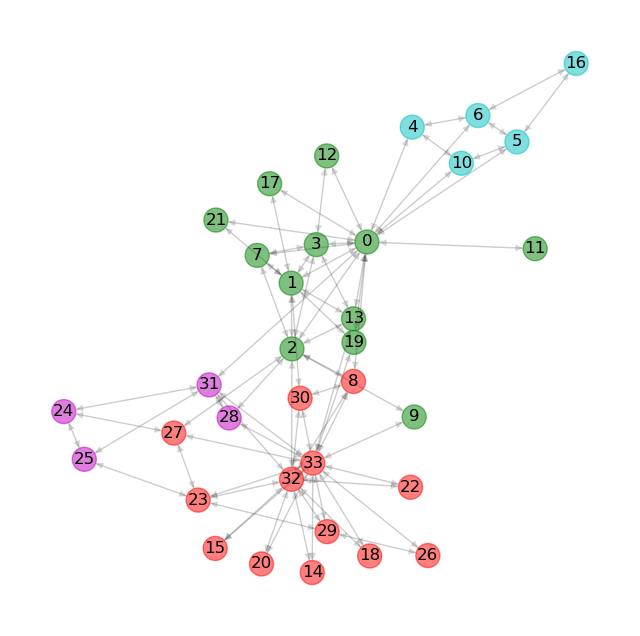

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx

G = to_networkx(dataset.data, to_undirected=False)
color = ["r", "g", "m", "c", "y"]

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=0.3)
node_color = [color[y] for y in dataset.data.y]
nx.draw_networkx_nodes(G, pos, alpha=0.5, node_color=node_color)
nx.draw_networkx_edges(G, pos, alpha=0.1)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.savefig("G.png")
plt.show()

## PubMedデータセット

In [14]:
dataset = datasets.Planetoid(root=".", name="PubMed")
dataset

PubMed()

In [15]:
print("number of graphs:\t\t",len(dataset))
print("number of classes:\t\t",dataset.num_classes)
print("number of node features:\t",dataset.num_node_features)
print("number of edge features:\t",dataset.num_edge_features)

number of graphs:		 1
number of classes:		 3
number of node features:	 500
number of edge features:	 0


In [16]:
dataset.data

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])

In [17]:
print("edge_index:\t\t",dataset.data.edge_index.shape)
print(dataset.data.edge_index)
print("\n")
print("x:\t\t",dataset.data.x.shape)
print(dataset.data.x)
print("\n")
print("y:\t\t",dataset.data.y.shape)
print(dataset.data.y)

edge_index:		 torch.Size([2, 88648])
tensor([[    0,     0,     0,  ..., 19714, 19715, 19716],
        [ 1378,  1544,  6092,  ..., 12278,  4284, 16030]])


x:		 torch.Size([19717, 500])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1046, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0194, 0.0080,  ..., 0.0000, 0.0000, 0.0000],
        [0.1078, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0266, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


y:		 torch.Size([19717])
tensor([1, 1, 0,  ..., 2, 0, 2])


## train_val_test_split

In [18]:
def train_val_test_split(data, val_ratio: float = 0.15,
                             test_ratio: float = 0.15):
    rnd = torch.rand(len(data.x))
    train_mask = [False if (x > val_ratio + test_ratio) else True for x in rnd]
    val_mask = [False if (val_ratio + test_ratio >= x) and (x > test_ratio) else True for x in rnd]
    test_mask = [False if (test_ratio >= x) else True for x in rnd]
    return torch.tensor(train_mask), torch.tensor(val_mask), torch.tensor(test_mask)

## GAT(Graph Attention Networks)

GATConv https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GATConv を使った GAT (Graph Attention Networks) クラスを実装します。

以下、pytorch-geometricにあるGATConvのドキュメントの翻訳

----------------------------------------------------
### GATConvのコンストラクタ

PARAMETER

- `in_channels (int or tuple)` 入力サイズ

- `out_channels (int)` 出力サイズ

- `heads (int, optional)` Multi-head-attentionの数 (default: 1)

- `concat (bool, optional)` Trueの時はconcat, Falseの時は平均をとる。

- `negative_slope (float, optional)` LeakyReLUのnegative_slopeのパラメータ(default: 0.2)

- `dropout (float, optional)` ドロップアウト比率(default: 0)

- `add_self_loops (bool, optional)` 自分自身へのループの有無 (default: True)

- `edge_dim (int, optional)` エッジ特徴量の次元(default: None)

- `fill_value (float or torch.Tensor or str, optional)` edge_dim!=Noneのときに自己ループの特徴を生成する方法を指定する ("add", "mean", "min", "max", "mul"). (default: "mean")

- `bias (bool, optional)` False に設定すると、レイヤーは加算バイアスを学習しない。(default: True)

- `**kwargs (optional)`

SHAPES:
- input: node features or  if bipartite, edge indices
, edge features (optional)

- output: node features or  if bipartite. If return_attention_weights=True, then  or if bipartite

-------------------------------------------------------
### GATConvのforward message passing(...model(hogehoge))

PARAMETERS
- `return_attention_weights (bool, optional)` True に設定すると、各エッジの計算された注目度を保持するタプル (edge_index, attention_weights) を追加で返します。(default: None)



In [19]:
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.hid = 8
        self.in_head = 8
        self.out_head = 1


        self.conv1 = GATConv(dataset.num_features, self.hid, heads=self.in_head, dropout=0.6)
        self.conv2 = GATConv(self.hid*self.in_head, dataset.num_classes, concat=False,
                             heads=self.out_head, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

### cuda or cpu

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = "cpu"

## KarateClub データセットのノードラベル予測

In [21]:
dataset = datasets.KarateClub()
data = dataset[0].to(device)
model = GAT().to(device)

In [22]:
data # x=[34,34]とかは各属性のサイズを示している

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [ ]:
#モデル構造をグラフで可視化、graphvizのインストールや環境変数の設定が終わってからでないとエラーが出力される。
#from torchviz import make_dot
#output = model(data)
#img = make_dot(output, params=dict(model.named_parameters()), show_attrs=True, show_saved=True)
#img.format = "png"
#img.render("model.dot") #ローカルだとうまくいかない？
#img

In [24]:
train_mask, val_mask, test_mask = train_val_test_split(dataset)

data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34], val_mask=[34], test_mask=[34])

In [25]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

losses = []
for epoch in range(2000):
    model.train()
    optimizer.zero_grad()
    out = model(dataset.data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    losses.append(loss.detach().numpy())

    if epoch % 200 == 0:
        print(loss)

    loss.backward()
    optimizer.step()

tensor(1.4139, grad_fn=<NllLossBackward0>)
tensor(0.4371, grad_fn=<NllLossBackward0>)
tensor(0.4853, grad_fn=<NllLossBackward0>)
tensor(0.4623, grad_fn=<NllLossBackward0>)
tensor(0.3002, grad_fn=<NllLossBackward0>)
tensor(0.1850, grad_fn=<NllLossBackward0>)
tensor(0.2905, grad_fn=<NllLossBackward0>)
tensor(0.4000, grad_fn=<NllLossBackward0>)
tensor(0.0449, grad_fn=<NllLossBackward0>)
tensor(0.0107, grad_fn=<NllLossBackward0>)


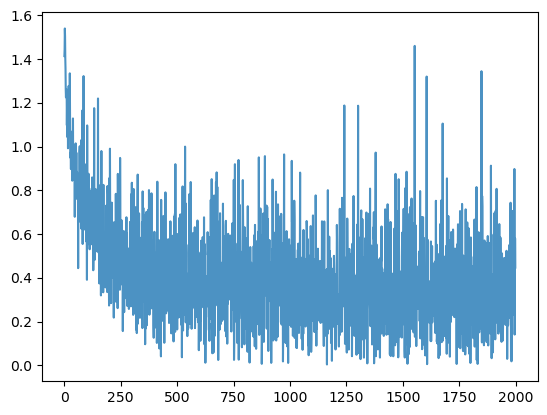

In [26]:
import matplotlib.pyplot

plt.plot(losses, alpha=0.8)

In [27]:
model(data)

tensor([[-4.4127e+00, -8.0921e-02, -2.7386e+00, -6.9576e+00],
        [-1.1558e+01, -2.1116e-03, -6.1679e+00, -1.2383e+01],
        [-3.2253e+00, -8.0909e-01, -6.7165e-01, -5.4894e+00],
        [-3.5809e+00, -1.1831e-01, -2.5080e+00, -6.0772e+00],
        [-9.7039e+00, -3.5782e-03, -5.6542e+00, -1.1729e+01],
        [-1.9622e+00, -5.3352e-01, -1.3419e+00, -4.4600e+00],
        [-3.2988e+00, -2.3634e-01, -1.7668e+00, -5.9201e+00],
        [-1.1320e+01, -9.0284e-04, -7.0272e+00, -1.2773e+01],
        [-3.4690e-01, -3.2632e+00, -1.3853e+00, -5.3817e+00],
        [-6.1166e+00, -3.0180e-03, -7.4279e+00, -8.4538e+00],
        [-1.5787e+00, -8.7378e-01, -9.9476e-01, -5.0238e+00],
        [-1.1101e+00, -8.1461e-01, -1.5542e+00, -4.1159e+00],
        [-1.4179e+01, -3.6387e-03, -5.6193e+00, -1.2384e+01],
        [-4.0763e+00, -7.7478e-02, -2.8835e+00, -6.4117e+00],
        [-7.7207e-01, -3.0120e+00, -7.2258e-01, -5.7285e+00],
        [-1.4943e-01, -9.1899e+00, -1.9766e+00, -8.7844e+00],
        

In [28]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.7241


## PubMed データセットのノードラベル予測

In [29]:
dataset = datasets.Planetoid(root=".", name="PubMed")
data = dataset[0].to(device)
model = GAT().to(device)

In [30]:
train_mask, val_mask, test_mask = train_val_test_split(data)

data.train_mask=train_mask
data.val_mask=val_mask
data.test_mask=test_mask

In [31]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

losses = []
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    losses.append(loss.detach().numpy())

    if epoch % 200 == 0:
        print(loss)

    loss.backward()
    optimizer.step()

tensor(1.1061, grad_fn=<NllLossBackward0>)
tensor(0.6231, grad_fn=<NllLossBackward0>)
tensor(0.6016, grad_fn=<NllLossBackward0>)
tensor(0.6190, grad_fn=<NllLossBackward0>)
tensor(0.6071, grad_fn=<NllLossBackward0>)


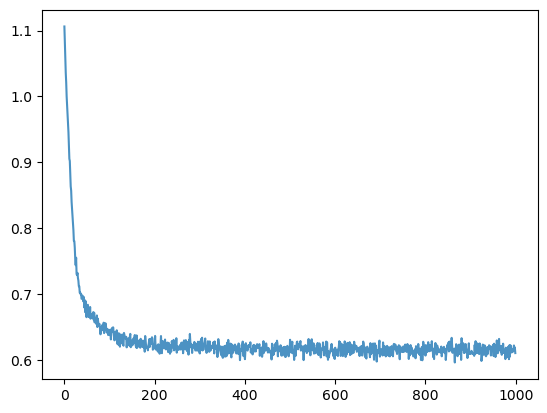

In [32]:
import matplotlib.pyplot

plt.plot(losses, alpha=0.8)

In [33]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.8593
